In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv("/content/Housing.csv")
df.head()

price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
df.describe()

price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000

In [7]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [8]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
540    False
541    False
542    False
543    False
544    False
Length: 545, dtype: bool

<Axes: xlabel='price', ylabel='area'>

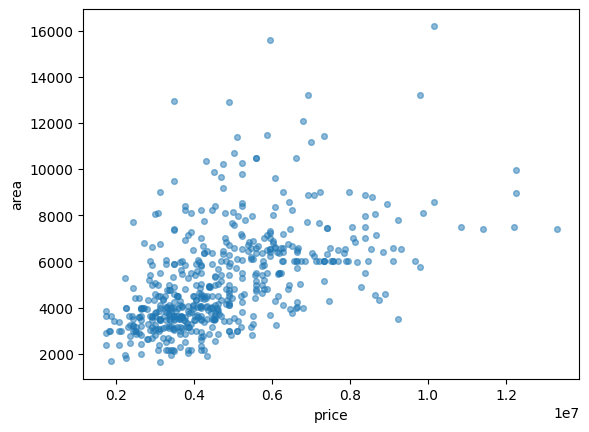

In [9]:
df.plot(kind='scatter', x='price', y='area', s=17, alpha=0.5)


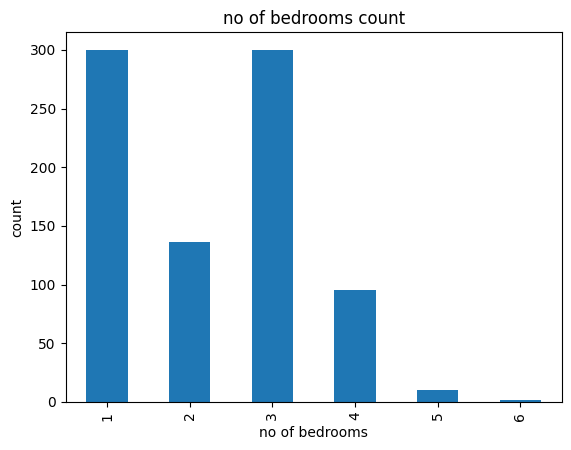

In [14]:
bedroom=df['bedrooms'].value_counts()
bedroom.plot(kind='bar')
bedroom_count_sorted=bedroom.sort_index()
bedroom_count_sorted.plot(kind='bar')
plt.title('no of bedrooms count')
plt.xlabel('no of bedrooms')
plt.ylabel('count')
plt.show()

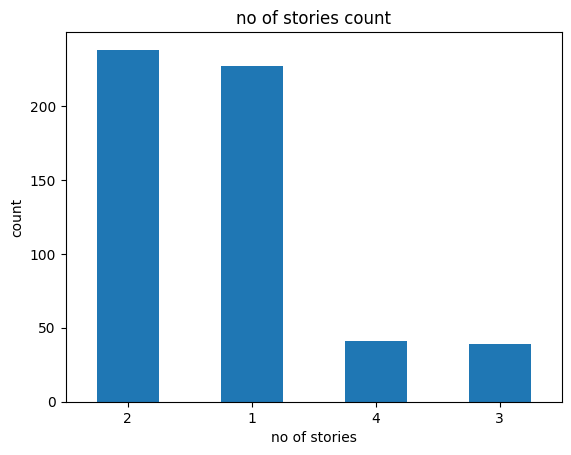

In [15]:
stories_count=df['stories'].value_counts()
stories_count.plot(kind='bar')
plt.title('no of stories count')
plt.xlabel('no of stories')
plt.ylabel('count')
plt.xticks(rotation=0)
plt.show()

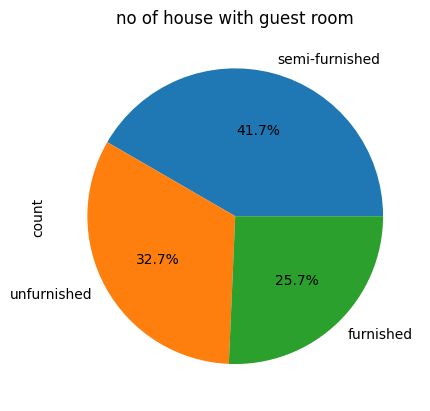

In [19]:
furnishing=df['furnishingstatus'].value_counts()
furnishing.plot(kind='pie',autopct='%1.1f%%')
plt.title('no of house with guest room')
plt.show()

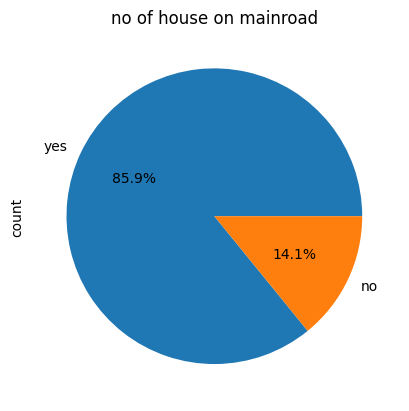

In [18]:
mainroad=df['mainroad'].value_counts()
mainroad.plot(kind='pie',autopct='%1.1f%%')
plt.title('no of house on mainroad')
plt.show()

In [22]:
encoder=LabelEncoder()
encoding=['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']
for i in encoding:
  df[i]=encoder.fit_transform(df[i])
df

price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0    13300000  7420         4          2        3         1          0   
1    12250000  8960         4          4        4         1          0   
2    12250000  9960         3          2        2         1          0   
3    12215000  7500         4          2        2         1          0   
4    11410000  7420         4          1        2         1          1   
..        ...   ...       ...        ...      ...       ...        ...   
540   1820000  3000         2          1        1         1          0   
541   1767150  2400         3          1        1         0          0   
542   1750000  3620         2          1        1         1          0   
543   1750000  2910         3          1        1         0          0   
544   1750000  3850         3          1        2         1          0   

     basement  hotwaterheating  airconditioning  parking  prefarea  \
0           0                0                1        2         1   
1           0                0                1        3         0   
2           1                0                0        2         1   
3           1                0                1        3         1   
4           1                0                1        2         0   
..        ...              ...              ...      ...       ...   
540         1                0                0        2         0   
541         0                0                0        0         0   
542         0                0                0        0         0   
543         0                0                0        0         0   
544         0                0                0        0         0   

     furnishingstatus  
0                   0  
1                   0  
2                   1  
3                   0  
4                   0  
..                ...  
540                 2  
541                 1  
542                 2  
543                 0  
544                 2  

[545 rows x 13 columns]

In [53]:
x=df.drop(columns=['price'],axis=1)
y=df['price']
x

area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
0    7420         4          2        3         1          0         0   
1    8960         4          4        4         1          0         0   
2    9960         3          2        2         1          0         1   
3    7500         4          2        2         1          0         1   
4    7420         4          1        2         1          1         1   
..    ...       ...        ...      ...       ...        ...       ...   
540  3000         2          1        1         1          0         1   
541  2400         3          1        1         0          0         0   
542  3620         2          1        1         1          0         0   
543  2910         3          1        1         0          0         0   
544  3850         3          1        2         1          0         0   

     hotwaterheating  airconditioning  parking  prefarea  furnishingstatus  
0                  0                1        2         1                 0  
1                  0                1        3         0                 0  
2                  0                0        2         1                 1  
3                  0                1        3         1                 0  
4                  0                1        2         0                 0  
..               ...              ...      ...       ...               ...  
540                0                0        2         0                 2  
541                0                0        0         0                 1  
542                0                0        0         0                 2  
543                0                0        0         0                 0  
544                0                0        0         0                 2  

[545 rows x 12 columns]

In [54]:
scaler=MinMaxScaler()
x=scaler.fit_transform(x)
x

array([[0.39656357, 0.6       , 0.33333333, ..., 0.66666667, 1.        ,
        0.        ],
       [0.5024055 , 0.6       , 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.57113402, 0.4       , 0.33333333, ..., 0.66666667, 1.        ,
        0.5       ],
       ...,
       [0.13539519, 0.2       , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.08659794, 0.4       , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.15120275, 0.4       , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [56]:
y = df['price']
scaler_y = MinMaxScaler()
y = y.values.reshape(-1, 1)
y = scaler_y.fit_transform(y)
y

array([[1.        ],
       [0.90909091],
       [0.90909091],
       [0.90606061],
       [0.83636364],
       [0.78787879],
       [0.72727273],
       [0.72727273],
       [0.7030303 ],
       [0.6969697 ],
       [0.6969697 ],
       [0.68666667],
       [0.65454545],
       [0.64848485],
       [0.64848485],
       [0.63636364],
       [0.63636364],
       [0.62424242],
       [0.61818182],
       [0.61515152],
       [0.60606061],
       [0.6       ],
       [0.5969697 ],
       [0.5969697 ],
       [0.59090909],
       [0.58787879],
       [0.58121212],
       [0.57575758],
       [0.57575758],
       [0.57575758],
       [0.57575758],
       [0.57575758],
       [0.56666667],
       [0.55757576],
       [0.55151515],
       [0.54813333],
       [0.54484848],
       [0.53939394],
       [0.53787879],
       [0.53333333],
       [0.53030303],
       [0.52727273],
       [0.51515152],
       [0.51515152],
       [0.5030303 ],
       [0.5030303 ],
       [0.5       ],
       [0.496

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=22)

In [58]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [59]:
y_pred = model.predict(x_test)
y_pred

array([[0.32702145],
       [0.1894459 ],
       [0.03110904],
       [0.36820832],
       [0.18441455],
       [0.48848474],
       [0.47478773],
       [0.48127062],
       [0.2814703 ],
       [0.29611216],
       [0.48517549],
       [0.28636514],
       [0.33628376],
       [0.2839412 ],
       [0.25435385],
       [0.33654059],
       [0.16095154],
       [0.51676384],
       [0.15223051],
       [0.12453267],
       [0.10993572],
       [0.1936609 ],
       [0.39975718],
       [0.2493329 ],
       [0.15010326],
       [0.17376672],
       [0.49539901],
       [0.12100212],
       [0.19788153],
       [0.37294568],
       [0.10452194],
       [0.15238741],
       [0.17194561],
       [0.13196358],
       [0.09321393],
       [0.11778755],
       [0.23525966],
       [0.45360435],
       [0.22251596],
       [0.15622749],
       [0.27972548],
       [0.08126028],
       [0.14420253],
       [0.25523934],
       [0.29462516],
       [0.31661893],
       [0.07491446],
       [0.377

In [61]:
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
mae,mse

(0.07296893220697936, 0.010145241466270776)

In [62]:
acc=r2_score(y_test,y_pred)
acc

0.6099761906359746